<a href="https://colab.research.google.com/github/Akshaykumar-ECE/Fake_news_classifier_using_LSTM/blob/main/Fake_news_classifier_using_LSTM_and_BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import nltk
nltk.download('stopwords')
# here we are importing nltk,stopwords and porterstemmer we are using stemming on the text
# we have and stopwords will help in removing the stopwords in the text

#re is regular expressions used for identifying only words in the text and ignoring anything else
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WELFake_Dataset.csv to WELFake_Dataset.csv


In [ ]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv("WELFake_Dataset.csv")
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
df.shape

(72134, 4)

In [ ]:
df=df.dropna()
df.shape

(71537, 4)

In [ ]:
x=df.drop('label',axis=1)
x.shape

(71537, 3)

In [ ]:
y=df['label']
y.shape

(71537,)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
# text preprocessing
corpus = []

for i in range(len(x)):
    review = re.sub('[^a-zA-Z]', ' ', x['title'].iloc[i])   # ✅ correct way
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [ ]:
corpus

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video',
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video',
 'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid',
 'satan russia unv imag terrifi new supernuk western world take notic',
 'time christian group sue amazon splc design hate group',
 'dr ben carson target ir never audit spoke nation prayer breakfast',
 'hous intel chair trump russia fake stori evid anyth video',
 'sport bar owner ban nfl game show true american sport like speak rural america video',
 'latest pipelin leak underscor danger dakota access pipelin',
 'gop senat smack punchabl alt right nazi internet',
 'may brexit offer would hurt cost eu citizen eu parliament',
 'schumer call trump appoint offici overse puerto rico relief',
 'watch hilari ad call question health age clinton crime famili boss',
 'chang expect espn polit agenda despit huge subscrib declin breitbart'

In [ ]:
voc_size=10000

one_hot_reps=[one_hot(word,voc_size) for word in corpus]

In [ ]:
one_hot_reps

[[4477, 5748, 8901, 9884, 7150, 8475, 4658, 3311, 8230, 6414, 8209, 199],
 [6303,
  5094,
  8919,
  7288,
  8612,
  9544,
  3778,
  5085,
  6766,
  6050,
  2231,
  8503,
  7045,
  199],
 [2646, 4968, 2888, 7481, 6599, 7787, 8222, 1900, 8742, 7781, 2198, 2966],
 [7786, 8898, 4467, 6071, 259, 4284, 5388, 5869, 5107, 1134, 709],
 [7332, 8222, 5844, 953, 2237, 5173, 3783, 1675, 5844],
 [445, 2777, 1655, 2134, 6498, 6100, 1273, 142, 2424, 89, 8701],
 [8320, 7708, 9332, 2318, 8898, 3333, 7787, 8712, 8674, 199],
 [640,
  7943,
  7907,
  6737,
  5308,
  1599,
  7967,
  107,
  7646,
  640,
  4675,
  9625,
  2707,
  9857,
  199],
 [7529, 7311, 8067, 5416, 5893, 2387, 5354, 7311],
 [5620, 4445, 7796, 9137, 9328, 1150, 7993, 5230],
 [2343, 7507, 8969, 7958, 8477, 8233, 4795, 3113, 4795, 5222],
 [3179, 961, 2318, 882, 5450, 7685, 2652, 2594, 3056],
 [514, 3769, 8220, 961, 5764, 9780, 8897, 8265, 5375, 4055, 102],
 [3183, 4304, 9511, 7641, 9508, 8945, 1606, 4665, 9174, 4387],
 [4577, 4113, 3365, 228

In [ ]:
# here we are specifying a sentence length so that every sentence in the corpus will be of same length
sent_length=500
#making all the sentence as equall size vector
#two types of padding pre and post
embedded_docs1=pad_sequences(one_hot_reps,padding='pre',maxlen=sent_length)

In [ ]:
embedded_docs1[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
x=np.array(embedded_docs1)

#label should be 0,1 for lstm
y=np.array(y)

#Creating the model for LSTM

In [ ]:
#Creating model
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')
embedded_feature_vector=300
nn=Sequential([

    Embedding(voc_size,embedded_feature_vector,input_length=sent_length),
    Dropout(0.5),
    LSTM(199),
    Dropout(0.4),
    Dense(399,activation='relu'),
    Dense(43,activation='relu'),
    Dense(1,activation='sigmoid')])
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Train the model on the training data with validation split
nn.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 38s 52ms/step - accuracy: 0.8244 - loss: 0.3700 - val_accuracy: 0.8979 - val_loss: 0.2447
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.9214 - loss: 0.1974 - val_accuracy: 0.8978 - val_loss: 0.2443
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9429 - loss: 0.1475 - val_accuracy: 0.8964 - val_loss: 0.2684
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.9571 - loss: 0.1129 - val_accuracy: 0.8965 - val_loss: 0.2830
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9652 - loss: 0.0861 - val_accuracy: 0.8967 - val_loss: 0.3695
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9734 - loss: 0.0655 - val_accuracy: 0.8961 - val_loss: 0.3439
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.9781 - loss: 0.0563 - val_accuracy: 0.8940 - val_loss: 0.4090
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.9838 - loss: 0.0444 - 

In [ ]:
loss, accuracy = nn.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


738/738 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8888 - loss: 0.5854
Test Loss: 0.5798295140266418
Test Accuracy: 0.8905456066131592


738/738 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step


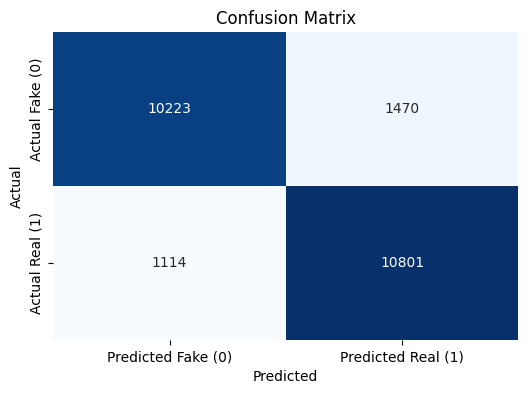

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get predictions
y_pred_prob = nn.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# 2. Build confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Fake (0)", "Predicted Real (1)"],
            yticklabels=["Actual Fake (0)", "Actual Real (1)"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


##Creating model for Bidirectional LSTM



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import warnings
warnings.filterwarnings('ignore')

embedded_feature_vector = 300

bilstm_model = Sequential([
    Embedding(voc_size, embedded_feature_vector, input_length=sent_length),
    Dropout(0.5),
    Bidirectional(LSTM(199)),
    Dropout(0.4),
    Dense(399, activation='relu'),
    Dense(43, activation='relu'),
    Dense(1, activation='sigmoid')
])

bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Train the model on the training data with validation split
bilstm_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 65s 103ms/step - accuracy: 0.8112 - loss: 0.3812 - val_accuracy: 0.8959 - val_loss: 0.2476
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9231 - loss: 0.1920 - val_accuracy: 0.8983 - val_loss: 0.2469
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.9436 - loss: 0.1449 - val_accuracy: 0.8953 - val_loss: 0.2593
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 60s 100ms/step - accuracy: 0.9543 - loss: 0.1145 - val_accuracy: 0.8959 - val_loss: 0.2856
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9646 - loss: 0.0897 - val_accuracy: 0.8920 - val_loss: 0.3369
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9711 - loss: 0.0747 - val_accuracy: 0.8924 - val_loss: 0.4112
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 60s 99ms/step - accuracy: 0.9758 - loss: 0.0597 - val_accuracy: 0.8916 - val_loss: 0.4095
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 60s 100ms/step - accuracy: 0.9806 - loss: 0.0

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get predictions from BiLSTM model
y_pred_prob_bilstm = bilstm_model.predict(X_test)
y_pred_bilstm = (y_pred_prob_bilstm > 0.5).astype(int)

# 2. Build confusion matrix
cm_bilstm = confusion_matrix(y_test, y_pred_bilstm)

# 3. Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_bilstm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Fake (0)", "Predicted Real (1)"],
            yticklabels=["Actual Fake (0)", "Actual Real (1)"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (BiLSTM Model)")
plt.show()


521/738 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step